任务二：正弦/余弦位置编码 + 曲线可视化

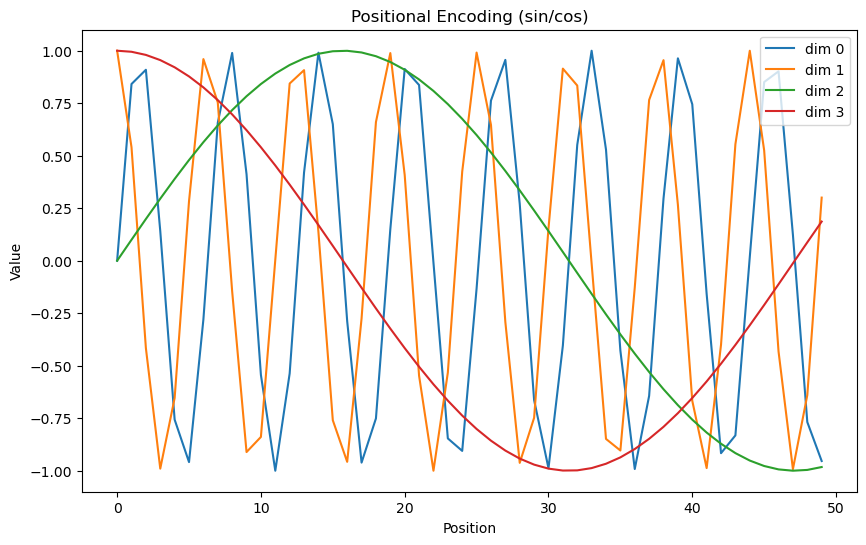

In [1]:
import torch
import matplotlib.pyplot as plt
import math

def positional_encoding(max_len, d_model):
    PE = torch.zeros(max_len, d_model)
    for pos in range(max_len):
        for i in range(0, d_model, 2):
            div_term = 10000 ** (2 * i / d_model)
            PE[pos, i] = math.sin(pos / div_term)
            if i + 1 < d_model:
                PE[pos, i+1] = math.cos(pos / div_term)
    return PE

# 生成编码 (序列长度=50, embedding维度=16)
PE = positional_encoding(50, 16)

# 可视化：画出前4个维度的曲线
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(PE[:, i].numpy(), label=f"dim {i}")
plt.legend()
plt.title("Positional Encoding (sin/cos)")
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()


横轴 (Position) = token 在句子里的位置（第几个词）。

纵轴 (Value) = 该位置在某个编码维度上的数值（sin 或 cos 的结果）。

不同维度的曲线：

维度 0：波长很长，变化慢 → 表示 全局趋势。

维度 1：波长稍短，变化快 → 表示 中等粒度的位置。

维度 2、3：波长更短，变化更快 → 表示 局部差异。



不同频率的 sin/cos 组合在一起，能让模型唯一地区分任意两个位置。

低频维度 → 捕捉句子里 整体位置关系（比如开头 vs 结尾）。

高频维度 → 捕捉 相邻 token 的差别（比如 word1 vs word2）。